# Projeto de Trainee - Visão Computacional
Por Camilla de Oliveira Fonseca

<img src="https://i.ibb.co/DtHQ3FG/802x265-Logo-GT.png" width="370">



Esse miniprojeto é na verdade uma missão secreta Jedi cujo objetivo é criar um sistema de segurança que classifica se uma imagem contém o Mestre Yoda, o Lord Sith Darth Vader ou algum Stormtrooper. Para isso está separado em 2 partes (Manipulação e Classificação).

# 1. Tarefas de Manipulação

## Tarefa 1.1
Criar uma função que recebe o endereço de uma imagem e retorna sua visualização.

### 1.1.1. Com Pillow

In [ ]:
#Importando a classe Image da Pillow
from PIL import Image

In [ ]:
def visualiza_img_pil(endereco):
    '''Recebe o endereco da img e retorna a visualizacao.'''
    
    # Cria um objeto Image 
    im = Image.open(endereco)
    
    # Exibe a img
    im.show()

In [ ]:
visualiza_img_pil(r".\dataset\Yoda\11f8fb4cdec14a3184a3ab3e3d76d5ac265206c5.jpg")

A função *visualiza_img_pil()* exibe a imagem em uma janela. Para que a imagem apareça no notebook, criei *visualiza_img_pil2()*.

In [ ]:
from IPython.display import display

In [ ]:
def visualiza_img_pil2(endereco):
    
    # Cria um objeto Image 
    im = Image.open(endereco)
    
    #Exibe a img
    display(im)

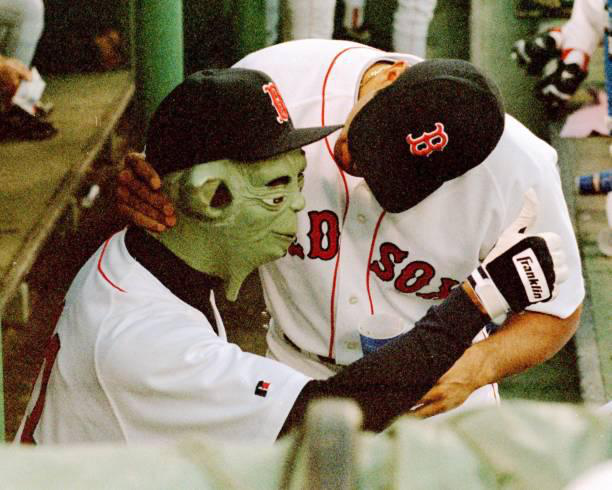

In [ ]:
visualiza_img_pil2(r".\dataset\Yoda\11f8fb4cdec14a3184a3ab3e3d76d5ac265206c5.jpg")

Podemos ver o Yoda disfarçado de jogador de beisebol para se esconder dos Sith.

### 1.1.2. Com matplotlib

In [1]:
import matplotlib.pyplot as plt

In [2]:
def visualiza_img_plt(endereco):
    # Carrega a img como array
    img = plt.imread(endereco)
    
    # Exibe a imagem
    imgplot = plt.imshow(img)
    
    # Tira os eixos
    plt.axis('off')
    
    plt.show()

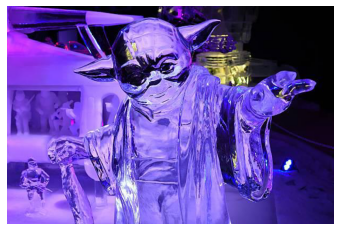

In [3]:
visualiza_img_plt(r".\dataset\Yoda\70a7274701636ab811e99afca3d32c2344f12526.jpg")

Vemos agora Yoda se camuflando com técnicas camaleônicas.

### 1.1.3. Com OpenCV

In [ ]:
import numpy as np

In [ ]:
import cv2

In [ ]:
def visualiza_img_cv2(endereco):
    
    # Carrega a img
    img = cv2.imread(endereco)
    
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
visualiza_img_cv2(r".\dataset\Yoda\9e6daae084d70410f13d482fb22c543f63871f7f.jpg")

*visualiza_img_cv2()* também exibe a imagem em uma janela.

Agora usando OpenCV *e* Matplotlib:

In [ ]:
def visualiza_img_cv2_2(endereco):
    
    # Carrega a img
    img_bgr = cv2.imread(endereco)
    
    # Converte a imagem para RGB, padrao do matplotlib, pq o da OpenCV eh BGR
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img_rgb)
    
    # Tira eixos
    plt.axis('off')
    
    plt.show()

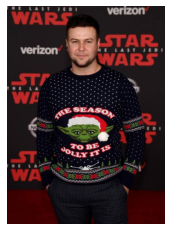

In [ ]:
visualiza_img_cv2_2(r".\dataset\Yoda\9e6daae084d70410f13d482fb22c543f63871f7f.jpg")

Ele realmente dominou a arte do disfarce.

## Tarefa 1.2
Escrever função que converte uma imagem colorida em uma imagem preto e branco usando numpy. Depois ver como converter espaços de cores usando OpenCV.

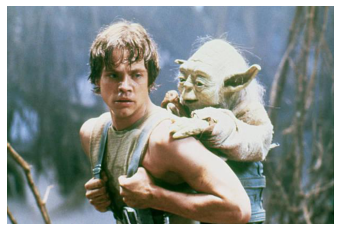

In [ ]:
img_teste = plt.imread(r".\dataset\Yoda\ca30b75ea62ffa2730afe88aab4f0784c5505986.jpg")

def visualiza_img_rgb(img, sem_eixo = True):
    '''Recebe um 3darray que representa uma imagem rgb e exibe sua visualizacao.
    Pode exibir a imagem sem (padrão) ou com eixo.'''
    imgplot = plt.imshow(img)
    if sem_eixo:
        plt.axis('off')
    plt.show()
    
visualiza_img_rgb(img_teste)

### Usando numpy

Uma imagem colorida é representada como um array tridimensional, composto de três arrays bidimensionais (vulgo matrizes), contendo os valores de cada pixel para cada canal: vermelho, verde e azul (RGB). Para convertê-la em uma imagem em preto e branco (que terá um só canal), fazemos uma combinação linear dos valores de vermelho, verde e azul para cada pixel e pegamos o valor resultante em grayscale. A forma mais intuitiva de fazer isso é fazendo uma média dos três valores, mas há também a seguinte fórmula: <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f84d67895d0594a852efb4a5ac421bf45b7ed7a8" width="400"> que foi estabelecida de acordo com a diferença na sensibilidade visual do olho humano para cada cor primária. R,G,Blinear correspondem à aplicação da expansão gamma dos valores de RGB que geralmente são armazenados com compressão gamma: <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b5eb0d87fe5e8f06d1000b348583e76e7d9ad32c" width="400">
Depois o Ylinear passa por compressão gamma novamente. Como essas operações tem alto custo computacional, usa-se também uma aproximação <img src="https://brohrer.github.io/images/image_processing/rgb2gray_eq_approx.png" width="300"> que é o que OpenCV faz. ([referência](https://www.kdnuggets.com/2019/12/convert-rgb-image-grayscale.html))

Implementarei a função com numpy usando a média.

In [ ]:
def para_PeB_np(img_rgb):
    '''(3darray) -> 1darray
    Recebe uma imagem em rgb e retorna a conversao em preto e branco dessa imagem.
    '''
    return np.mean(img_rgb, axis=2)

def visualiza_img_PeB(img_peb):
    '''Recebe um 1darray que representa uma imagem p&b e exibe sua visualizacao.'''
    imgplot = plt.imshow(img_peb, cmap = 'gray')
    plt.axis('off')
    plt.show()

### Com OpenCV

In [ ]:
def para_PeB_cv2(img_bgr):
    '''(3darray) -> 1darray
    Recebe uma imagem em bgr e retorna a conversao em preto e branco dessa imagem.
    '''
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

Com numpy:


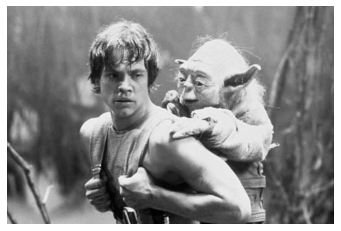

Com OpenCV:


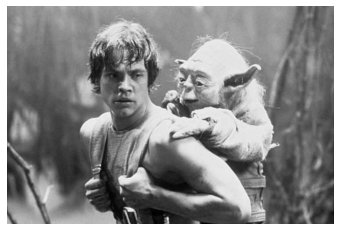

In [ ]:
print("Com numpy:")
visualiza_img_PeB(para_PeB_np(img_teste))
print("Com OpenCV:")
visualiza_img_PeB(para_PeB_cv2(img_teste))

Vemos a comparação do resultado dos dois métodos de conversão.

Vale notar também que OpenCV usa espaços BGR em vez de RGB, cuja diferença é a ordem dos canais no array tridimensional.

## Tarefa 1.3
Augmentation: fazer algumas modificações nas imagens existentes para criar imagens que contenham informações novas e aumentar o dataset.
Crie uma função que recebe uma imagem e aplica o processo de augmentation nela.
Técnicas a serem usadas:
    - Inverter a imagem (flip)
    - Rotacionar de um ângulo aleatório
    - Zoom aleatório na imagem
    - Contraste aleatório
    - Brilho aleatório

Vou implementar a rotação e o contraste na mão com numpy.

In [ ]:
def rotaciona(img, ang_graus, preserva = True):
    '''(array, float) -> array
    Recebe uma imagem e um angulo em graus e retorna a rotacao da imagem desse angulo.
    A imagem resultante pode preservar a dimensao original, cortando a imagem (padrao),
    ou ter dimensao nova, preservando toda a original.'''
    
    # Pega dimensoes da img
    nlin,ncol,c = img.shape
    
    # Calcula seno e cosseno
    ang_rad = np.radians(ang_graus)
    sen_a = np.sin(ang_rad)
    cos_a = np.cos(ang_rad)
    
    # Calcula dimensoes da imagem resultante
    if preserva:
        nlin_rot, ncol_rot = nlin, ncol
    else:
        # Dimensoes para caber tudo
        nlin_rot= int(np.ceil(nlin*abs(cos_a) + ncol*abs(sen_a)))
        ncol_rot= int(np.ceil(nlin*abs(sen_a) + ncol*abs(cos_a)))
    
    # Cria matriz de zeros
    img_rot = np.zeros([nlin_rot,ncol_rot,c], dtype=np.uint8)
    
    # Calcula coordenados do centro das imagens
    centro_original = np.ceil((nlin/2,ncol/2))
    centro_rot = np.ceil((nlin_rot/2,ncol_rot/2))
    
    # Rotaciona a imagem com base na matriz de rotacao transposta
    # Transformacao que interpola cada pixel de img_rot em img
    for lin in range(nlin_rot):
        for col in range(ncol_rot):
            
            x = (lin - centro_rot[0])*cos_a + (col - centro_rot[1])*sen_a
            y = -(lin - centro_rot[0])*sen_a + (col - centro_rot[1])*cos_a
            x = int(np.round(x) + centro_original[0])
            y = int(np.round(y) + centro_original[1])
            
            if (x>=0 and y>=0 and x<nlin and y<ncol):
                img_rot[lin,col] = img[x,y]
                
    return img_rot

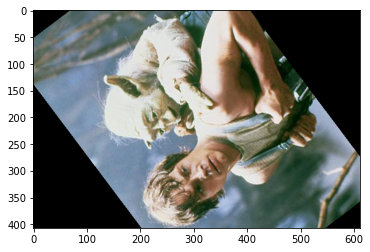

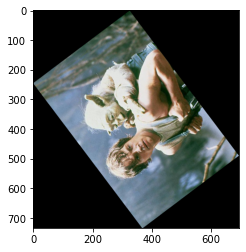

In [ ]:
visualiza_img_rgb(rotaciona(img_teste, 127), sem_eixo = False)
visualiza_img_rgb(rotaciona(img_teste, 127, False), sem_eixo = False)

Um modo de implementar o contraste é multiplicar cada pixel por uma constante positiva k, se k>1, o contraste aumenta, se k<1, diminui, não deixando os valores saírem do intervalo [0, 255]

In [ ]:
def contraste(img, k):
    '''(array, float) -> array
    Recebe uma imagem e um fator de contraste (constante positiva)
    e retorna a imagem com contraste ajustado de acordo com esse fator.'''
    
    # Pega dimensoes da img
    nlin,ncol,c = img.shape
    
    # Cria matriz de zeros
    img_contr = np.zeros([nlin,ncol,c], dtype=np.uint8)
    
    for lin in range(nlin):
        for col in range(ncol):
            for chan in range(c):
                v = img[lin,col,chan]*k
                if v>255:
                    v = 255
                elif v<0:
                    v = 0
                img_contr[lin,col,chan] = v
            
    return img_contr

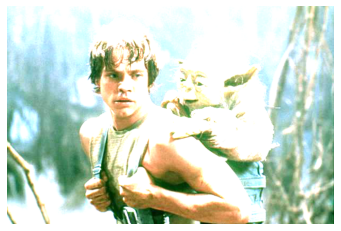

In [ ]:
visualiza_img_rgb(contraste(img_teste, 2))

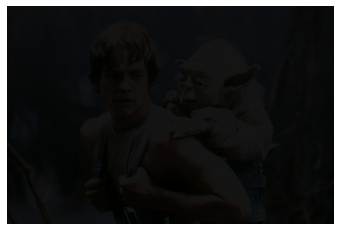

In [ ]:
visualiza_img_rgb(contraste(img_teste, 0.09))

Vou implementar o zoom com scipy, flip e brilho com OpenCV.

In [ ]:
from scipy.ndimage import zoom

In [ ]:
def zoom_corta(img, fator_zoom):
    '''(array, float) -> array
    Recebe uma imagem e um fator de zoom igual ou superior a 1 e retorna
    uma imagem correspondente ao seu zoom de acordo com esse fator,
    cortando-a para preservar a dimensao.'''
    
    # Se o fator for 1, a imagem nao se alterara
    if fator_zoom == 1:
        return img

    nlin, ncol = img.shape[:2]

    # Em imagens coloridas, nao queremos aplicar o zoom na dimensao RGB
    # Entao, cria tupla de fatores zoom, um para cada dimensao do array
    # Com fator 1 para qualquer dimensao depois da altura e largura
    fzoom_tupla = (fator_zoom,) * 2 + (1,) * (img.ndim - 2)
        
    # Calcula coordenadas para selecionarmos apenas a regiao
    # da imagem original que estara no zoom
    z_nlin = int(np.ceil(nlin / fator_zoom))
    z_ncol = int(np.ceil(ncol / fator_zoom))
    z_x = (nlin - z_nlin) // 2
    z_y = (ncol - z_ncol) // 2

    # Cria imagem zoom
    img_zoom = zoom(img[z_x : z_x + z_nlin, z_y : z_y + z_ncol], fzoom_tupla)

    # 'img_zoom' ainda pode estar um pouco maior que 'img' por conta de
    # arredondamento, entao ajusta a dimensao da imagem zoom
    x_ajuste = ((img_zoom.shape[0] - nlin) // 2)
    y_ajuste = ((img_zoom.shape[1] - ncol) // 2)
    img_zoom = img_zoom[x_ajuste : x_ajuste + nlin, y_ajuste : y_ajuste + ncol]

    return img_zoom

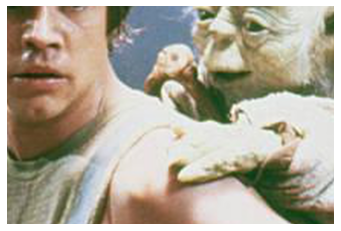

In [ ]:
visualiza_img_rgb(zoom_corta(img_teste, 2.85))

In [ ]:
def brilho(img, fator_brilho):
    '''(array, float) -> array
    Recebe uma imagem e um fator de brilho e retorna a imagem
    com brilho ajustado de acordo com esse fator.'''
    
    # Converte para hsv
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # Adiciona o fator ao brilho de cada pixel
    h, s, v = cv2.split(hsv_img)
    v = cv2.add(v, fator_brilho)
    v[v > 255] = 255
    v[v < 0] = 0
    hsv_img = cv2.merge((h, s, v))
    
    # Converte de volta para rgb e retorna o resultado
    return cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

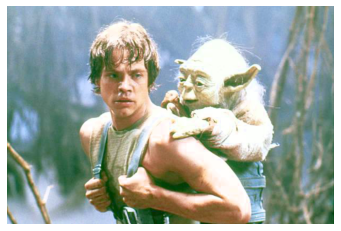

In [ ]:
visualiza_img_rgb(brilho(img_teste, 35))

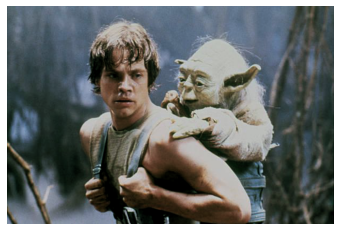

In [ ]:
visualiza_img_rgb(brilho(img_teste, -40.5))

### Augmentation

In [ ]:
import random

In [ ]:
def augmentation(img):
    '''(array) -> array
    Recebe uma imagem, aplica o processo de augmentation e retorna uma imagem 'aumentada'.'''
    
    img_aug = np.copy(img)
    
    # Flip
    # Se o segundo argumento (int) for >0, o flip sera feito em torno do eixo y;
    # = 0, em torno de x; <0, em torno de ambos
    img_aug = cv2.flip(img_aug, random.randint(-1,1))
    
    # Zoom aleatorio, 1 <= fator de zoom (float) <= 4
    img_aug = zoom_corta(img_aug, random.uniform(1,4))
    
    # Contraste aleatorio, 0.1 <= fator de contraste <= 3
    img_aug = contraste(img_aug, random.uniform(0.1,3))
    
    # Brilho aleatorio, -70 <= fator de brilho <= 70
    img_aug = brilho(img_aug, random.uniform(-70,70))
    
    # Rotacao de angulo em graus aleatorio
    img_aug = rotaciona(img_aug, random.uniform(0,360))
    
    return img_aug

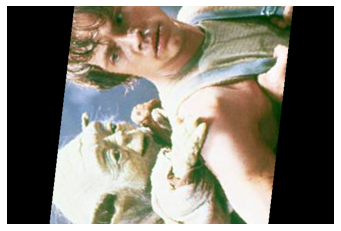

In [ ]:
visualiza_img_rgb(augmentation(img_teste))

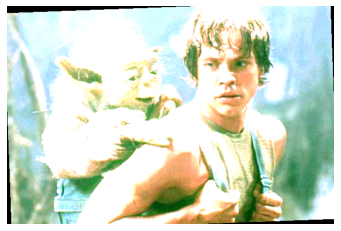

In [ ]:
visualiza_img_rgb(augmentation(img_teste))

## Tarefa 1.4
Aplicar em uma imagem um filtro de blur, gaussian blur e median blur.
Criar um kernel e aplicar na imagem utilizando OpenCV.

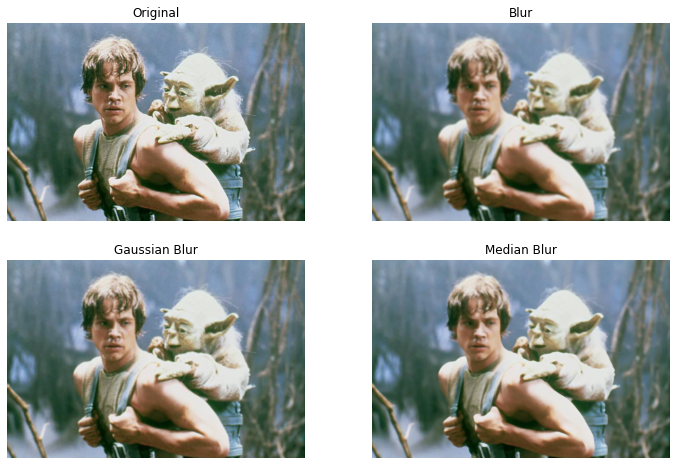

In [ ]:
plt.subplot(2,2,1),plt.imshow(img_teste),plt.title('Original')
plt.axis('off')
plt.subplot(2,2,2),plt.imshow(cv2.blur(img_teste, (5,5))),plt.title('Blur')
plt.axis('off')
plt.subplot(2,2,3),plt.imshow(cv2.GaussianBlur(img_teste, (5,5),1)),plt.title('Gaussian Blur')
plt.axis('off')
plt.subplot(2,2,4),plt.imshow(cv2.medianBlur(img_teste,5)),plt.title('Median Blur')
plt.axis('off') 
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### Testando outros kernels

In [ ]:
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

custom = np.array((
    [0, 1, 0],
    [1, -5, 1],
    [0, 1, 0]), dtype="int")

laplace = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

O primeiro kernel é um kernel de apuração, o segundo eu criei para ver o que acontecia se invertesse os valores e lembra um pouco o operador de Laplace. Abaixo, vemos que o segundo ressalta um pouco os contornos da imagem, embora não tão bem quanto o de Laplace.

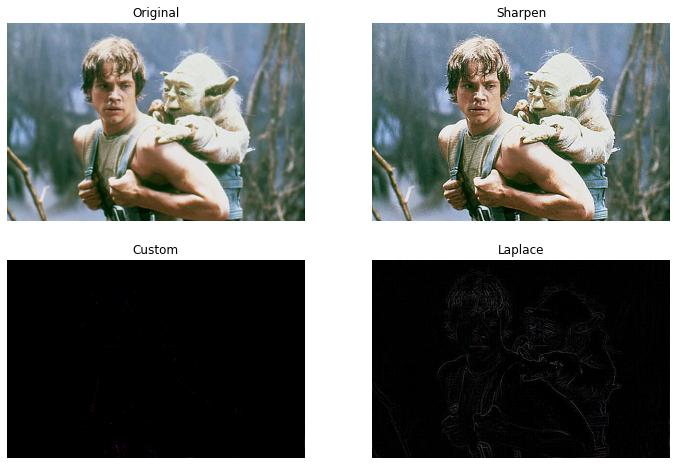

In [ ]:
plt.subplot(2,2,1),plt.imshow(img_teste),plt.title('Original')
plt.axis('off')
plt.subplot(2,2,2),plt.imshow(cv2.filter2D(img_teste, -1, sharpen)),plt.title('Sharpen')
plt.axis('off')
plt.subplot(2,2,3),plt.imshow(cv2.filter2D(img_teste, -1, custom)),plt.title('Custom')
plt.axis('off')
plt.subplot(2,2,4),plt.imshow(cv2.filter2D(img_teste, -1, laplace)),plt.title('Laplace')
plt.axis('off') 
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

# 2. Tarefas de Classificação

## Tarefa 2.1
Dividir as imagens em um diretório com imagens de treino, teste e validação.

Vou usar os, shutil e numpy.

In [ ]:
import os

In [ ]:
import shutil

In [ ]:
def separa_train_test_val(root_dir, classes_dir, test_ratio, val_ratio):
    '''Recebe um diretorio com um sub-diretorio para cada classe, onde as imagens das respectivas
    classes estao armazenadas; uma lista com os sub-diretorios; a porcentagem de dados para teste e validacao.
    Separa as imagens em diretorios "train", "test" e "val" de acordo com essas porcentagens.
    '''
    
    for cls in classes_dir:
        train_dest = os.path.join(root_dir,"train", cls)
        test_dest = os.path.join(root_dir, "test", cls)
        val_dest = os.path.join(root_dir, "validation", cls)
        os.makedirs(train_dest, exist_ok=True)
        os.makedirs(test_dest, exist_ok=True)
        os.makedirs(val_dest, exist_ok=True)

    
        src = os.path.join(root_dir, cls) # Caminho da pasta de onde copiaremos os arquivos
    
        # Cria particoes dos arquivos depois de embaralhar
        allFileNames = os.listdir(src)
        len_files = len(allFileNames)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              [int(len_files* (1 - val_ratio - test_ratio)), 
                                                               int(len_files* (1 - test_ratio))])


        train_FileNames = [os.path.join(src, name) for name in train_FileNames.tolist()]
        val_FileNames = [os.path.join(src, name)  for name in val_FileNames.tolist()]
        test_FileNames = [os.path.join(src, name)  for name in test_FileNames.tolist()]

        print("### Classe: " + cls)
        print('Total de images: ', len_files)
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
        print('Testing: ', len(test_FileNames))

        # 'Copia e cola' as imgs
        for name in train_FileNames:
            shutil.copy(name, train_dest)

        for name in val_FileNames:
            shutil.copy(name, val_dest)

        for name in test_FileNames:
            shutil.copy(name, test_dest)

In [ ]:
root_dir = r"./dataset/"
classes_dir = ["Darth Vader", "Stormtrooper", "Yoda"]
test_ratio = 0.15
val_ratio = 0.15

In [ ]:
separa_train_test_val(root_dir, classes_dir, test_ratio, val_ratio)

### Classe: Darth Vader
Total de images:  690
Training:  482
Validation:  104
Testing:  104
### Classe: Stormtrooper
Total de images:  649
Training:  454
Validation:  97
Testing:  98
### Classe: Yoda
Total de images:  488
Training:  341
Validation:  73
Testing:  74


## Tarefa 2.2
Transformar as imagens de uma forma que o modelo consegue aprender.

In [ ]:
import PIL

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
TRAIN_DIR = '/content/drive/My Drive/cv-trainee/separado/train'
VAL_DIR = '/content/drive/My Drive/cv-trainee/separado/validation'
TEST_DIR = '/content/drive/My Drive/cv-trainee/separado/test'

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  TRAIN_DIR,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1277 files belonging to 3 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  VAL_DIR,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 274 files belonging to 3 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  TEST_DIR,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 276 files belonging to 3 classes.


A função image_dataset_from_directory() do keras faz essa transformacao automaticamente para diretorios estruturados como o nosso. Vamos dar uma conferida nas classes:

In [ ]:
train_class_names = train_ds.class_names
test_class_names = test_ds.class_names
val_class_names = val_ds.class_names
print(train_class_names, test_class_names, val_class_names)

['Darth Vader', 'Stormtrooper', 'Yoda'] ['Darth Vader', 'Stormtrooper', 'Yoda'] ['Darth Vader', 'Stormtrooper', 'Yoda']


Agora vamos dar uma olhada nos dados, visualizando as 6 primeiras imagens de cada dataset:



Dados: train 



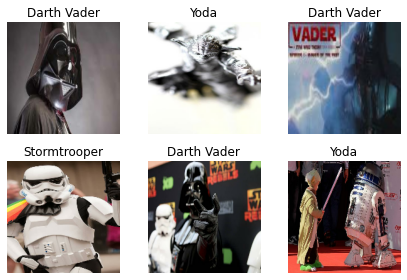


Dados: validation 



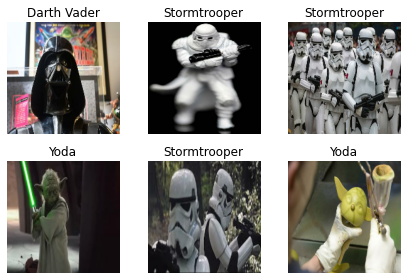


Dados: test 



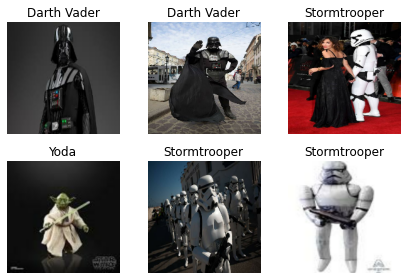

In [ ]:
datasets = {'train': [train_ds, train_class_names], 'validation': [val_ds, val_class_names], 'test': [test_ds, test_class_names]}

def plotter(ds, class_names):
  for images, labels in ds.take(1):
    for i in range(6):
      ax = plt.subplot(2, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")
  plt.tight_layout()
  plt.show()

for ds in datasets:
  print("\nDados: %s \n"%(ds))
  plotter(datasets[ds][0], datasets[ds][1])

## Tarefa 2.3
Criar modelo qualquer para classificar as imagens.

Vou usar uma regressão logística.

As imagens transformadas na tarefa 2.2 serão usadas na tarefa 2.4, aqui irei processar de modo diferente.

### Pré-processamento

In [25]:
def get_data(path, img_h, img_w):
  '''Recebe um caminho para o diretorio do dataset de imagens, dimensoes para
  padronizar as imagens e retorna um array com todas as imagens redimensionadas,
  convertidas para grayscale e transformadas em um 1darray outro com as labels.'''

  all_images_as_array=[]
  label=[]

  for cls in os.listdir(path):
    cls_path = os.path.join(path, cls)
    for filename in os.listdir(cls_path):
      file_path = os.path.join(cls_path, filename)

      # Confere qual a classe para adicionar a lista label
      # darth=0; storm=1; yoda=2 
      if cls == "Darth Vader":
        label.append(0)
      elif cls == "Stormtrooper":
        label.append(1)
      else:
        label.append(2)
      
      # Carrega, processa e transforma a img em array
      img = PIL.Image.open(file_path)
      img = img.convert('L')
      img = img.resize((img_h, img_w))
      img = np.array(img, np.float32)
      all_images_as_array.append(img)

  return np.array(all_images_as_array), np.array(label, np.uint8)

In [36]:
img_h, img_w = 64,64 #aqui vou usar imgs menores p facilitar a convergencia
X_train, y_train = get_data(TRAIN_DIR, img_h, img_w)
X_val, y_val = get_data(VAL_DIR, img_h, img_w)
X_test, y_test = get_data(TEST_DIR, img_h, img_w)

In [27]:
print(X_train.shape, X_train[0].shape, y_train.shape)

(1277, 64, 64) (64, 64) (1277,)


In [28]:
print(X_train[0])

[[172. 172. 167. ... 156. 158. 165.]
 [167. 167. 170. ... 164. 158. 156.]
 [156. 155. 151. ... 156. 153. 153.]
 ...
 [ 26.  25.  56. ...  38.  38.  44.]
 [ 17.  24.  39. ...  32.  40.  48.]
 [ 26.  30.  41. ...  33.  47.  50.]]


In [38]:
num_features = img_h*img_w
X_train, X_test = X_train.reshape([-1, num_features]), X_test.reshape([-1, num_features])
X_val = X_val.reshape([-1, num_features])

In [30]:
print(X_train.shape, X_train[0].shape)
print(X_train[0])

(1277, 4096) (4096,)
[172. 172. 167. ...  33.  47.  50.]


As imagens foram lidas, redimensionadas, convertidas para grayscale e transformadas em um array 1d de tamanho *img_height* x *img_width*. Foi criado também um array com as labels.

Agora vamos normalizar os pixels das imagens com StandardScaler.

In [54]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [55]:
print(X_train[0])

[ 0.7390118   0.7211423   0.64146763 ... -0.77198863 -0.5986753
 -0.5577833 ]


### Modelo

Vamos usar o GridSearch para encontrar os melhores hiperparametros. Como já tenho os datasets de treino e validação separados, poderia usar o GridSearchCV com o PredefinedSplit do sklearn, mas vou usar o pacote hypopt que facilita nesse caso.

In [32]:
!pip install hypopt

In [33]:
from hypopt import GridSearch

In [34]:
from sklearn.linear_model import LogisticRegression

In [42]:
param_grid =  {'C': np.logspace(-3,3,7), 'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}

# Gridsearch de tds as combinacoes
opt = GridSearch(model = LogisticRegression(max_iter=1000), param_grid = param_grid)

opt.fit(X_train, y_train, X_val, y_val)


  4%|▎         | 1/28 [00:05<02:32,  5.66s/it]/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')

 14%|█▍        | 4/28 [00:40<04:20, 10.87s/it]/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')

 29%|██▊       | 8/28 [02:01<08:31, 25.55s/it]/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algori

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
print("Melhores hiperparametros: ", opt.get_best_params)

Melhores hiperparametros:  <bound method GridSearch.get_best_params of GridSearch(cv_folds=3,
           model=LogisticRegression(C=0.001, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False),
           num_threads=2, parallelize=True,
           param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                       'penalty': ['l2'],
                       'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
           seed=0)>


Vemos que na busca, muitas combinações nem convergiam, mesmo com um número de iterações bem alto.

Agora que encontramos os melhores hiperparametros, podemos fazer o modelo com eles:

In [50]:
reg_log = LogisticRegression(penalty = 'l2', C = 0.001, solver = 'lbfgs')
reg_log.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
from sklearn import metrics

In [53]:
# Vamos usar o modelo para prever no teste
y_pred = reg_log.predict(X_test)

count_misclassified = (y_test != y_pred).sum()
print('Imagens classificadas erroneamente: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {:.2f}'.format(accuracy))

Imagens classificadas erroneamente: 91
Acurácia: 0.67


Conseguimos uma acurácia de 67% no teste com esse modelo.

In [64]:
import pickle

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [65]:
with open('/content/drive/My Drive/cv-trainee/reg_logistica/reglog.pkl', 'wb') as f:
    pickle.dump(reg_log, f)

## Tarefa 2.4
Criar uma rede de convolução e sentir o poder do lado convolucional da Força.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Criando o modelo

In [ ]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compilando o modelo

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Sumário

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Treinando o modelo

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
40/40 [==============================] - 83s 2s/step - loss: 0.9944 - accuracy: 0.5341 - val_loss: 0.7312 - val_accuracy: 0.6752
Epoch 2/10
40/40 [==============================] - 38s 938ms/step - loss: 0.6248 - accuracy: 0.7596 - val_loss: 0.7061 - val_accuracy: 0.6898
Epoch 3/10
40/40 [==============================] - 37s 936ms/step - loss: 0.4334 - accuracy: 0.8457 - val_loss: 0.5306 - val_accuracy: 0.7956
Epoch 4/10
40/40 [==============================] - 37s 935ms/step - loss: 0.2963 - accuracy: 0.8958 - val_loss: 0.6126 - val_accuracy: 0.7737
Epoch 5/10
40/40 [==============================] - 37s 937ms/step - loss: 0.2129 - accuracy: 0.9287 - val_loss: 0.6848 - val_accuracy: 0.7263
Epoch 6/10
40/40 [==============================] - 37s 932ms/step - loss: 0.2094 - accuracy: 0.9240 - val_loss: 0.6678 - val_accuracy: 0.7810
Epoch 7/10
40/40 [==============================] - 37s 935ms/step - loss: 0.0936 - accuracy: 0.9734 - val_loss: 0.8963 - val_accuracy: 0.7628
Ep

### Resultados

Vamos ver os plots de loss e acuracia nos datasets de treino e validação.

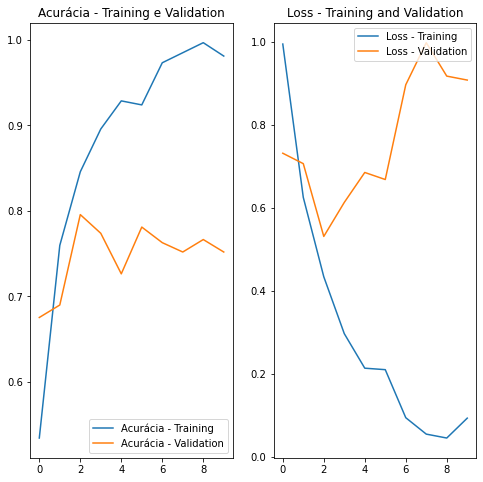

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia - Training')
plt.plot(epochs_range, val_acc, label='Acurácia - Validation')
plt.legend(loc='lower right')
plt.title('Acurácia - Training e Validation')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss - Training')
plt.plot(epochs_range, val_loss, label='Loss - Validation')
plt.legend(loc='upper right')
plt.title('Loss - Training and Validation')
plt.show()

Testando o modelo no dataset de teste:

In [ ]:
score = model.evaluate(test_ds, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.9574394822120667 / Test accuracy: 0.7753623127937317


A acurácia no dataset de teste foi 77,5%, já é melhor do que a regressão logística. Mas no primeiro gráfico, vemos que a acurácia de treinamento cresce quase que linearmente enquanto a de validação fica por volta de 75%. Além disso, a diferença entre as acurácias é notável, o que indica overfitting.

In [ ]:
from tensorflow.keras.models import save_model

In [ ]:
filepath = '/content/drive/My Drive/cv-trainee/rede_1'
save_model(model, filepath)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/cv-trainee/rede_1/assets


## Tarefa 2.5
Otimizar a rede!

### Modelo 2

Vamos aplicar data augmentation e dropout na rede para lidar com o overfitting.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom((0.1, 0.3)),
  ]
)

Uma função de augmentation bem mais eficiente do que a implementada anteriormente nesse notebook, rs.

O dropout consiste dropar aleatoriamente uma fração dos outputs de uma camada e será feito com *layers.Dropout()*.

In [ ]:
model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
40/40 [==============================] - 47s 1s/step - loss: 1.0275 - accuracy: 0.5325 - val_loss: 0.6893 - val_accuracy: 0.7190
Epoch 2/15
40/40 [==============================] - 45s 1s/step - loss: 0.6458 - accuracy: 0.7486 - val_loss: 0.6206 - val_accuracy: 0.7701
Epoch 3/15
40/40 [==============================] - 45s 1s/step - loss: 0.5552 - accuracy: 0.7815 - val_loss: 0.7077 - val_accuracy: 0.7409
Epoch 4/15
40/40 [==============================] - 45s 1s/step - loss: 0.5233 - accuracy: 0.8066 - val_loss: 0.6022 - val_accuracy: 0.7664
Epoch 5/15
40/40 [==============================] - 45s 1s/step - loss: 0.5238 - accuracy: 0.8027 - val_loss: 0.5350 - val_accuracy: 0.7847
Epoch 6/15
40/40 [==============================] - 45s 1s/step - loss: 0.4777 - accuracy: 0.8144 - val_loss: 0.5441 - val_accuracy: 0.7920
Epoch 7/15
40/40 [==============================] - 45s 1s/step - loss: 0.4753 - accuracy: 0.8207 - val_loss: 0.5855 - val_accuracy: 0.7956
Epoch 8/15
40/40 [==

Vamos agora plotar os resultados e testar na base de teste:

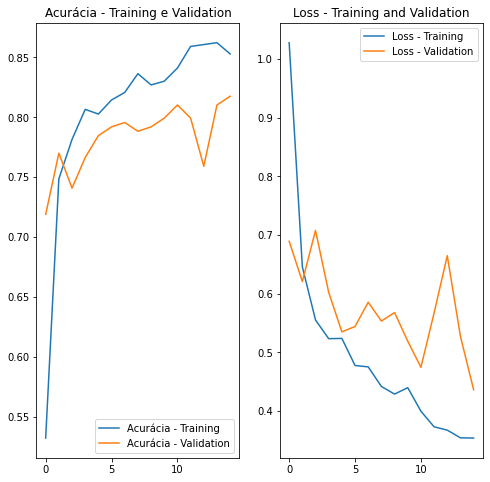

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia - Training')
plt.plot(epochs_range, val_acc, label='Acurácia - Validation')
plt.legend(loc='lower right')
plt.title('Acurácia - Training e Validation')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss - Training')
plt.plot(epochs_range, val_loss, label='Loss - Validation')
plt.legend(loc='upper right')
plt.title('Loss - Training and Validation')
plt.show()

In [ ]:
score = model2.evaluate(test_ds, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.5681600570678711 / Test accuracy: 0.7971014380455017


Conseguimos agora uma acurácia de 79,7% no dataset de teste, não muito maior do que antes, mas vemos que os gráficos de acurácia e loss já estão melhores.

In [ ]:
save_model(model2, "/content/drive/My Drive/cv-trainee/rede_2")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/cv-trainee/rede_2/assets


### Modelo 3
Vamos tentar aplicar mais camadas de convolução e aumentar um pouco mais o número de epochs.

In [ ]:
model3 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 128)      

In [ ]:
epochs = 20
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
40/40 [==============================] - 134s 3s/step - loss: 1.0615 - accuracy: 0.4409 - val_loss: 0.8709 - val_accuracy: 0.6168
Epoch 2/20
40/40 [==============================] - 134s 3s/step - loss: 0.8536 - accuracy: 0.6006 - val_loss: 0.7664 - val_accuracy: 0.6277
Epoch 3/20
40/40 [==============================] - 134s 3s/step - loss: 0.7010 - accuracy: 0.7173 - val_loss: 0.8518 - val_accuracy: 0.7007
Epoch 4/20
40/40 [==============================] - 134s 3s/step - loss: 0.5740 - accuracy: 0.7776 - val_loss: 0.6703 - val_accuracy: 0.7445
Epoch 5/20
40/40 [==============================] - 138s 3s/step - loss: 0.5279 - accuracy: 0.7870 - val_loss: 0.5768 - val_accuracy: 0.7883
Epoch 6/20
40/40 [==============================] - 133s 3s/step - loss: 0.5549 - accuracy: 0.7847 - val_loss: 0.5476 - val_accuracy: 0.7810
Epoch 7/20
40/40 [==============================] - 133s 3s/step - loss: 0.5128 - accuracy: 0.8113 - val_loss: 0.4286 - val_accuracy: 0.8394
Epoch 8/20
40

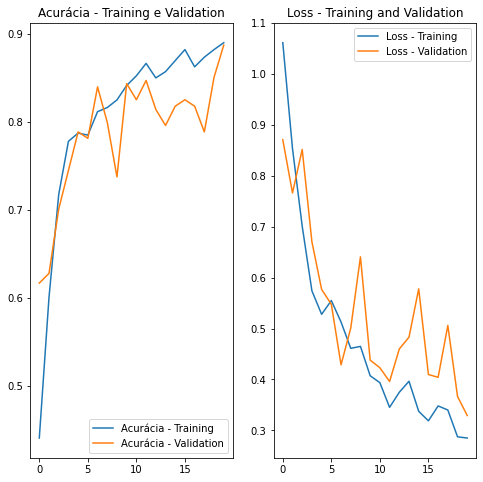

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia - Training')
plt.plot(epochs_range, val_acc, label='Acurácia - Validation')
plt.legend(loc='lower right')
plt.title('Acurácia - Training e Validation')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss - Training')
plt.plot(epochs_range, val_loss, label='Loss - Validation')
plt.legend(loc='upper right')
plt.title('Loss - Training and Validation')
plt.show()

In [ ]:
score = model3.evaluate(test_ds, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.39520055055618286 / Test accuracy: 0.8659420013427734


Conseguimos resultados ainda melhores, com acurácia de 86,6% no dataset de teste. O maior número de epochs é um fator que ajuda muito na convergência.

In [ ]:
save_model(model3, "/content/drive/My Drive/cv-trainee/rede_3")

INFO:tensorflow:Assets written to: /content/drive/My Drive/cv-trainee/rede_3/assets


### Modelo 4
Agora vamos experimentar outras funções de ativação.

Por enquanto usei apelas ReLU. A Softmax é uma função geralmente usada nma última camada de modelos de classificação multi-classe. Nas demais camadas, vou alternar entre a Leaky ReLU e a ReLU.

In [ ]:
from keras.layers import LeakyReLU

In [ ]:
model4 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same'),
  layers.LeakyReLU(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same'),
  layers.LeakyReLU(),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same'),
  layers.LeakyReLU(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 180, 180, 32)      0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 45, 45, 64)       

In [ ]:
epochs = 20
history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
40/40 [==============================] - 139s 3s/step - loss: 1.0367 - accuracy: 0.4902 - val_loss: 0.9861 - val_accuracy: 0.5511
Epoch 2/20
40/40 [==============================] - 138s 3s/step - loss: 0.9432 - accuracy: 0.5920 - val_loss: 0.9390 - val_accuracy: 0.5912
Epoch 3/20
40/40 [==============================] - 142s 4s/step - loss: 0.9293 - accuracy: 0.6069 - val_loss: 0.9020 - val_accuracy: 0.6241
Epoch 4/20
40/40 [==============================] - 138s 3s/step - loss: 0.9330 - accuracy: 0.5975 - val_loss: 0.9908 - val_accuracy: 0.5511
Epoch 5/20
40/40 [==============================] - 138s 3s/step - loss: 0.9178 - accuracy: 0.6249 - val_loss: 0.9080 - val_accuracy: 0.6314
Epoch 6/20
40/40 [==============================] - 138s 3s/step - loss: 0.9155 - accuracy: 0.6288 - val_loss: 0.8999 - val_accuracy: 0.6460
Epoch 7/20
40/40 [==============================] - 141s 4s/step - loss: 0.9041 - accuracy: 0.6335 - val_loss: 0.9867 - val_accuracy: 0.5547
Epoch 8/20
40

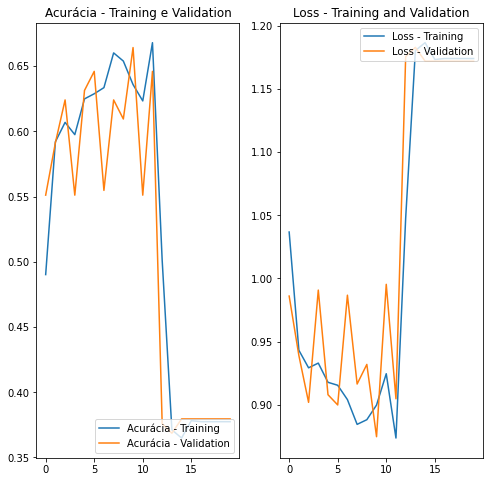

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia - Training')
plt.plot(epochs_range, val_acc, label='Acurácia - Validation')
plt.legend(loc='lower right')
plt.title('Acurácia - Training e Validation')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss - Training')
plt.plot(epochs_range, val_loss, label='Loss - Validation')
plt.legend(loc='upper right')
plt.title('Loss - Training and Validation')
plt.show()

In [ ]:
score = model4.evaluate(test_ds, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.1746330261230469 / Test accuracy: 0.37681159377098083


Deu bem ruim kk não sei se só por conta das mudanças nas funções de ativação ou se cometi algum erro. A acurácia despencando e a loss saltando repentinamente é bem estranho.

In [ ]:
save_model(model4, "/content/drive/My Drive/cv-trainee/rede_4")

INFO:tensorflow:Assets written to: /content/drive/My Drive/cv-trainee/rede_4/assets


## Testando em uma imagem que não estava nos datasets

In [ ]:
meuvader_path ='/content/drive/My Drive/cv-trainee/meuvader.HEIC'

img = keras.preprocessing.image.load_img(
    meuvader_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)

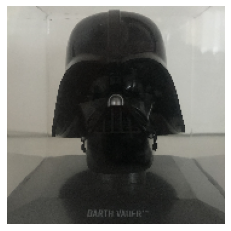

In [ ]:
plt.imshow(img_array.astype('uint8'))
plt.axis('off')
plt.show()

Por fim, vamos ver se conseguimos usar a rede do modelo 3 (que performou melhor) para classificar esse elemento suspeito que encontrei escondido em minha casa.

In [ ]:
img_array = tf.expand_dims(img_array, 0) # Criar batch

predictions = model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Nesta imagem vemos um {} com {:.2f} porcento de confiança."
    .format(train_class_names[np.argmax(score)], 100 * np.max(score))
)

Nesta imagem vemos um Darth Vader com 98.49 porcento de confiança.
